# Analysis

- More successful treatments not only showed reduced tumor volume, but as a whole generated tighter results distributions. For example, Ramicane produced the smallest average tumor volumes, but also showed much smaller degrees of variance and a smaller standard deviation, whereas Ketapril not only resulted in the largest average tumor volume but also possesed a much larger variance and wider distribution. The four most promising treatments' mean tumor volumes are valuable, as they are not plagued with outliers. A single outlier among all treatment candidates in the Capomulin, Ramicane, Ceftamin, and Infubinol studies reinforces the thesis that better mean volumes are strongly correlated with better distribution and lower variance. 


- Overall subject weight is strongly correlated with tumor volume. An R coefficient of .84 in the Capomulin trials illustrates a positive correlation, with an increase in subject weight strongly predicting a proportionate increase in tumor volume. Perhaps looking into whether average mouse weight is equally distributed among all treatment groups will confirm this, as worse performing treatments may have a heavier average mouse weight.


- Capomulin produces occasional unpredictability in results. Running a random mouse generator in the line plot section allows for displaying multiple treatment trajectories with each run, which showcase how, though mean volumes are lower than most other medications, the paths to those means can be sometimes unpredictable. Mouse u364, for example, shows no reduction in tumor size until timepoint 15, whereas Mouse s710 shows an initial volume decrease followed by nearly exponential volume increase for five timepoints in a row. It seems that the end result trends toward volume reduction, but the unpredictability in *how* that reduction occurs is interesting to note. Perhaps longer trials would lead to insight, with trends either decreasing in volitility over time or maybe remaining just as volitile.

# Importing dependencies and creating initial dataframe

The two data sets must be merged into a single dataframe.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Finding and removing repeat values

Running a values count on all of the mice will determine whether any mouse is referenced more than the others.

In [2]:
# Checking to see if any mouse is referenced more times than any other
mouse_df['Mouse ID'].value_counts()

g989    13
a897    10
l733    10
a203    10
i738    10
        ..
v199     1
d133     1
u153     1
b447     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

We can see that mouse g989 has several more references than any other mouse. We can display that mouse's info...

In [3]:
# Displaying all rows for mouse g989
mouse_df.loc[mouse_df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


... and see that several timepoints have been repeated. Now we have to remove this mouse from our dataframe.

In [4]:
# Creating a cleaned dataframe by removing mouse g989
mouse_cleaned = mouse_df.loc[mouse_df['Mouse ID'] != 'g989', :]

# Creating summary table by drug treatment

Displaying most of our summary data by drug treatment is fairly straightforward, but we'll need a sample from the dataframe to derive the standard error. The standard error will fluctuate with each run, as the sample will be randomly chosen each time.

In [5]:
# Creating a .groupby object by treatment
drug_group = mouse_cleaned.groupby('Drug Regimen')

# Creating aggregated variables for summary dataframe
tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()

# Creating a randomized sample to find standard error
tumor_sample = mouse_cleaned.sample(25)
tumor_sample_group = tumor_sample.groupby('Drug Regimen')
tumor_sem = st.sem(tumor_sample['Tumor Volume (mm3)'])

# Building summary dataframe from variables
drug_summary_table = pd.DataFrame(
{'Mean': tumor_mean, 
 'Median': tumor_median, 
 'Variance': tumor_variance, 
 'Standard Deviation': tumor_std, 
 'Standard Error': tumor_sem})

# Removing the index label and sorting by variance
drug_summary_table.index.name = None
drug_summary_table.sort_values(by=['Variance'])

,Mean,Median,Variance,Standard Deviation,Standard Error
Ramicane,40.216745,40.673236,23.486704,4.846308,1.960614
Capomulin,40.675741,41.557809,24.947764,4.994774,1.960614
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.960614
Infubinol,52.884795,51.820584,43.128684,6.567243,1.960614
Propriva,52.320930,50.446266,43.852013,6.622085,1.960614
Zoniferol,53.236507,51.818479,48.533355,6.966589,1.960614
Stelasyn,54.233149,52.431737,59.450562,7.710419,1.960614
Placebo,54.033581,52.288934,61.168083,7.821003,1.960614
Naftisol,54.331565,52.509285,66.173479,8.134708,1.960614
Ketapril,55.235638,53.698743,68.553577,8.279709,1.960614


# Creating bar charts (by drug treatment)

We'll need a breakdown of how many mice are involved in each drug treatment. We can create an ordered summary table and use its columns as axes for the two bar charts.

In [6]:
# Creating summary count table by treatment
drug_counts = drug_group['Mouse ID'].nunique()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
drug_counts_sorted

Zoniferol    25
Ramicane     25
Placebo      25
Naftisol     25
Ketapril     25
Infubinol    25
Ceftamin     25
Capomulin    25
Stelasyn     24
Propriva     24
Name: Mouse ID, dtype: int64

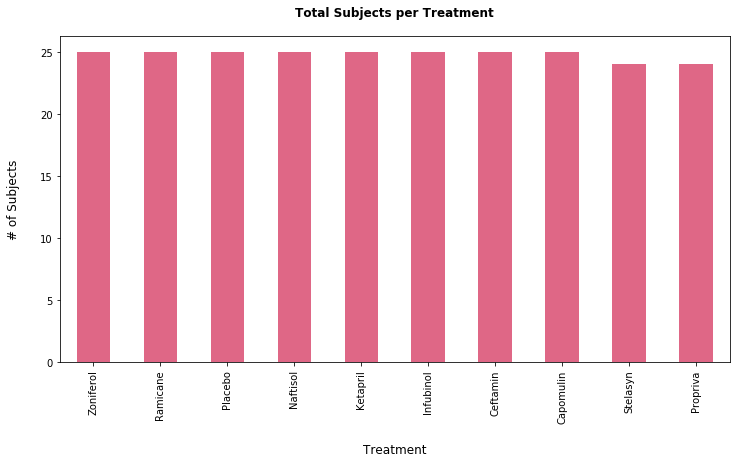

In [7]:
# Using built-in Pandas bar plot on summary count table
drug_plot = drug_counts_sorted.plot(kind="bar", figsize=(12,6), facecolor='#df6786')
plt.xlabel('Treatment', labelpad=20, fontsize='large')
plt.ylabel('# of Subjects', labelpad=20, fontsize='large')
plt.title('Total Subjects per Treatment', fontweight='bold', fontsize='large', pad=20)
plt.show()

In [8]:
# Creating axis variables from Pandas columns for Matplotlib bar plot
x_index = drug_counts_sorted.index
x_axis = [x for x in x_index]

y_axis = [x for x in drug_counts_sorted]

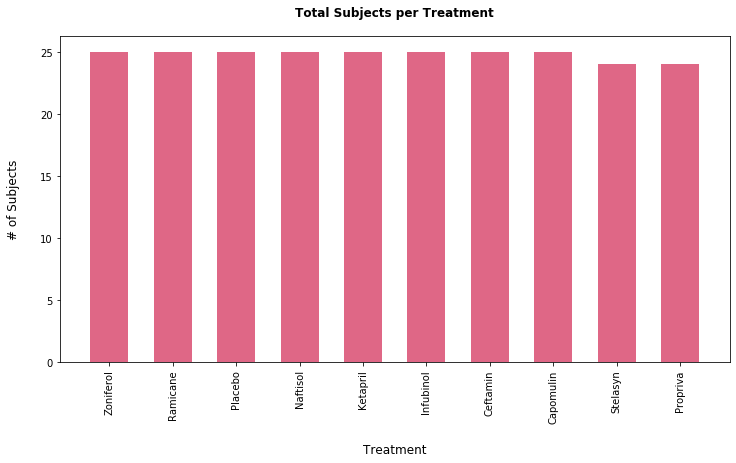

In [9]:
# Building and formatting Matplotlib bar plot
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis, width=.6, facecolor='#df6786')
plt.xlabel('Treatment', labelpad=20, fontsize='large')
plt.ylabel('# of Subjects', labelpad=20, fontsize='large')
plt.title('Total Subjects per Treatment', fontweight='bold', fontsize='large', pad=20)
plt.xticks(rotation=90)
plt.show()

# Creating pie charts (by sex)

Similar to the bar charts, we'll need some sort of frequency table to display the full population of mice broken up by sex. The pie charting functions will automatically convert those frequencies into relative frequencies (percents).

In [10]:
# Creating summary count table by sex
sex_group = mouse_cleaned.groupby('Sex')
sex_counts = sex_group['Mouse ID'].nunique()
sex_counts

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [11]:
# Creating variables for labels and values from summary count table
labels = [x for x in sex_counts.index]
pie_values = [x for x in sex_counts]

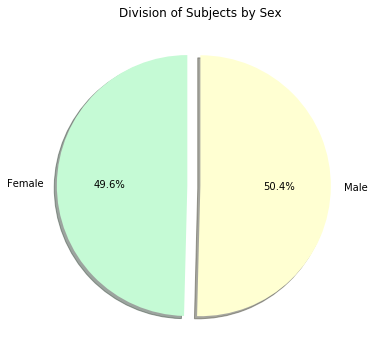

In [12]:
# Building and formatting pie chart using Pandas built-in pie chart
sex_counts.plot.pie(figsize=(12,6), autopct='%1.1f%%', explode=(.1, 0), 
                    shadow=True, colors=('#c5fad5', '#ffffd2'), startangle=90)
plt.title('Division of Subjects by Sex')
plt.ylabel('')
plt.show()

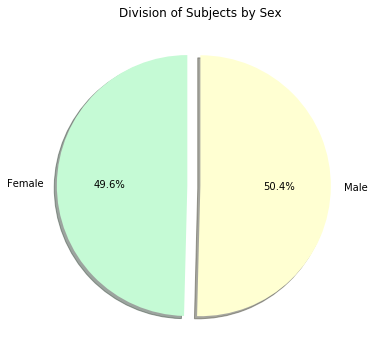

In [13]:
# Building and formatting pie chart using Matplotlib
plt.figure(figsize=(12,6))
plt.pie(pie_values, labels=labels, autopct="%1.1f%%", explode=(.1,0), 
        shadow=True, colors=('#c5fad5', '#ffffd2'), startangle=90)
plt.title('Division of Subjects by Sex')
plt.show()

# Calculating tumor volume across most promising treatments

Grouping the mice by treatment and ID allows for easy access to the final tumor volume for each individual mouse. Splitting the grouped dataframe further into individual treatment dataframes for our four most promising treatments allows for finding the unique quantitative bounds for each treatment.

In [14]:
# Creating .groupby object to organize by treatment and mouse
drug_mouse_group = mouse_cleaned.groupby(['Drug Regimen', 'Mouse ID'])

# Building final volume summary dataframe for reference
tumor_mass = pd.DataFrame(drug_mouse_group['Tumor Volume (mm3)'].last())

# Building individual tumor mass dataframes by treatment
capomulin_tumor_mass = tumor_mass.loc[
['Capomulin']]
ramicane_tumor_mass = tumor_mass.loc[
['Ramicane']]
infubinol_tumor_mass = tumor_mass.loc[
['Infubinol']]
ceftamin_tumor_mass = tumor_mass.loc[
['Ceftamin']]

### Finding the Capomulin outliers

In [15]:
# Determining quartiles, interquartile range, and bounds
quartiles = capomulin_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

cap_lb = lq-(1.5*iqr)
cap_ub = uq+(1.5*iqr)

# Building a dataframe of all Capomulin outliers
cap_outlier_df = capomulin_tumor_mass.loc[(capomulin_tumor_mass['Tumor Volume (mm3)'] < cap_lb) 
                                      | (capomulin_tumor_mass['Tumor Volume (mm3)'] > cap_ub), :]

# Displaying outliers in a dataframe
cap_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,


There are no outliers in the Capomulin study.

### Finding the Ramicane outliers

In [16]:
# Determining quartiles, interquartile range, and bounds
quartiles = ramicane_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

ram_lb = lq-(1.5*iqr)
ram_ub = uq+(1.5*iqr)

# Building a dataframe of all Ramicane outliers
ram_outlier_df = ramicane_tumor_mass.loc[(ramicane_tumor_mass['Tumor Volume (mm3)'] < ram_lb) 
                                      | (ramicane_tumor_mass['Tumor Volume (mm3)'] > ram_ub), :]

# Displaying outliers in a dataframe
ram_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,


There are no outliers in the Ramicane study.

### Finding the Infubinol outliers

In [17]:
# Determining quartiles, interquartile range, and bounds
quartiles = infubinol_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

inf_lb = lq-(1.5*iqr)
inf_ub = uq+(1.5*iqr)

# Building a dataframe of all Infubinol outliers
inf_outlier_df = infubinol_tumor_mass.loc[(infubinol_tumor_mass['Tumor Volume (mm3)'] < inf_lb) 
                                      | (infubinol_tumor_mass['Tumor Volume (mm3)'] > inf_ub), :]

# Displaying outliers in a dataframe
inf_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,
Infubinol,c326,36.321346


There is one outlier in the Infubinol study.

### Finding the Ceftamin outliers

In [18]:
# Determining quartiles, interquartile range, and bounds
quartiles = ceftamin_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

cef_lb = lq-(1.5*iqr)
cef_ub = uq+(1.5*iqr)

# Building a dataframe of all Ceftamin outliers
cef_outlier_df = ceftamin_tumor_mass.loc[(ceftamin_tumor_mass['Tumor Volume (mm3)'] < cef_lb) 
                                      | (ceftamin_tumor_mass['Tumor Volume (mm3)'] > cef_ub), :]

# Displaying outliers in a dataframe
cef_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,


There are no outliers in the Ceftamin study.

# Boxplot

Using a box and whisker plot illustrates and reinforces our findings from initial outliers testing.

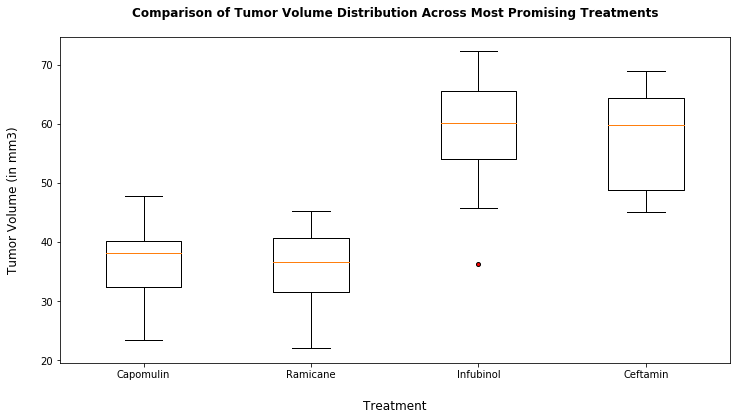

In [19]:
# Creating data, label, and marker variables
box_data = [capomulin_tumor_mass['Tumor Volume (mm3)'], ramicane_tumor_mass['Tumor Volume (mm3)'], 
            infubinol_tumor_mass['Tumor Volume (mm3)'], ceftamin_tumor_mass['Tumor Volume (mm3)']]
tick_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
markers = dict(marker='.', markerfacecolor='red', markersize=8)

# Building and formatting box and whisker plot
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.boxplot(box_data, flierprops=markers)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Comparison of Tumor Volume Distribution Across Most Promising Treatments', fontweight='bold', pad=20)
ax1.set_xlabel('Treatment', labelpad=20, fontsize='large')
ax1.set_ylabel('Tumor Volume (in mm3)', labelpad=20, fontsize='large')
plt.show()

# Plotting individual results for Capomulin over time

Plotting each mouse's change in tumor volume over time is useful for a quick look into higher level results. Creating a generator to pull a random mouse from the Capomulin study allows us to display multiple mice to look for trends. 

In [20]:
# Creating a random sample generator to pick a mouse to be charted
sample_generator = mouse_cleaned.loc[mouse_cleaned['Drug Regimen'] == 'Capomulin', :].sample(1)
sample_generator

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
13,s185,Capomulin,Female,3,17,15,38.177232,0


In [21]:
# Pulling all rows for the sampled mouse out of the master dataframe
sample_mouse = mouse_cleaned.loc[mouse_cleaned['Mouse ID'] == sample_generator.iloc[0,0], :]
sample_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


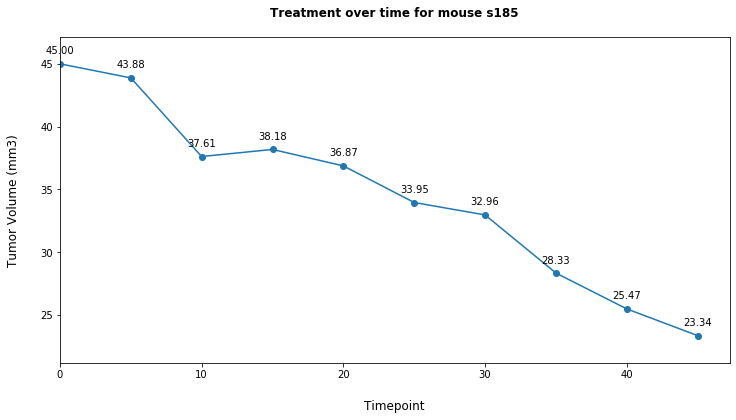

In [22]:
# Building line plot for sampled mouse
plt.figure(figsize=(12,6))
plt.plot(sample_mouse['Timepoint'], sample_mouse['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint', labelpad=20, fontsize='large')
plt.ylabel('Tumor Volume (mm3)', labelpad=20, fontsize='large')
plt.xlim(0)
plt.margins(.1)
plt.title(f"Treatment over time for mouse {sample_mouse.iloc[0,0]}", pad=20, fontweight='bold')

# Adding labels to individual timepoints
for x,y in zip(sample_mouse['Timepoint'], sample_mouse['Tumor Volume (mm3)']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Scatterplot

Creating a scatterplot to visualize the average tumor volume by mouse weight is useful for drawing correlations and predicting the results of future studies. 

In [23]:
# Creating an exclusive dataframe that only include Capomulin treated mice
capomulin_df = mouse_cleaned.loc[mouse_cleaned['Drug Regimen'] == 'Capomulin', :]

In [24]:
# Grouping mice by ID
mouse_group = capomulin_df.groupby('Mouse ID')

# Creating axis variables
weights = mouse_group['Weight (g)'].last()
volumes = mouse_group['Tumor Volume (mm3)'].mean()

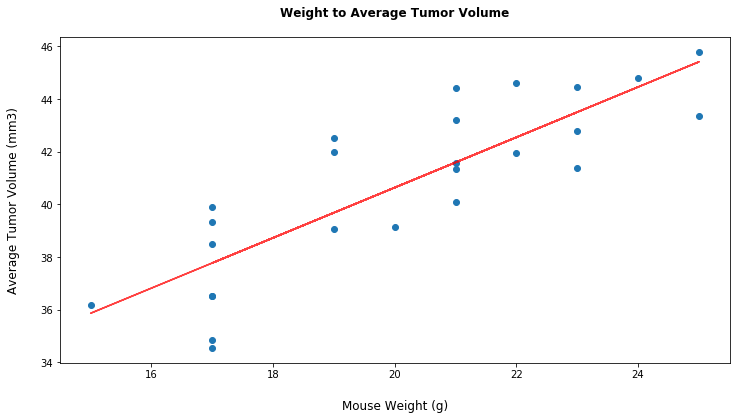

The correlation coefficient is 0.84
The line of best fit equation is y = 0.95x + 21.55


In [25]:
# Building scatterplot
plt.figure(figsize=(12,6))
plt.scatter(weights, volumes)
plt.title('Weight to Average Tumor Volume', pad=20, fontweight='bold')
plt.xlabel('Mouse Weight (g)', labelpad=20, fontsize='large')
plt.ylabel('Average Tumor Volume (mm3)', labelpad=20, fontsize='large')

# Unpacking linear regression returns into tuple
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, volumes)

# Using line slope to create y-axis values for regression line
regress_values = weights * slope + intercept

# Plotting regression line over scatterplot
plt.plot(weights, regress_values, "r-", alpha=.75)
plt.show()

# Displaying correlation coefficient
print(f"The correlation coefficient is {round(rvalue,2)}")
print(f"The line of best fit equation is y = {round(slope,2)}x + {round(intercept,2)}")